In [63]:
import pandas as pd
import numpy as np
import panel as pn
import holoviews as hv

pn.extension()

CSV_FILE = ('game_data.csv')

def get_data():
    return pd.read_csv(CSV_FILE)


In [64]:
df = get_data()

df.head()

,game_number,guess,correct,too high,too low
0,1,3,0,0,1
1,1,35,0,1,0
2,1,23,0,1,0
3,1,12,0,0,1
4,1,18,0,1,0


In [65]:
games_played = df.game_number.unique()
number_of_games = games_played[-1]


total_guesses = df.groupby('game_number')['guess'].count().reset_index().rename(columns = {'guess' : 'total_guesses'})
total_guesses.sort_values('game_number', ascending = True)

,game_number,total_guesses
0,1,8
1,2,7
2,3,6
3,4,8
4,5,5
5,6,8
6,7,6
7,8,5
8,9,8
9,10,1


<Axes: xlabel='game_number'>

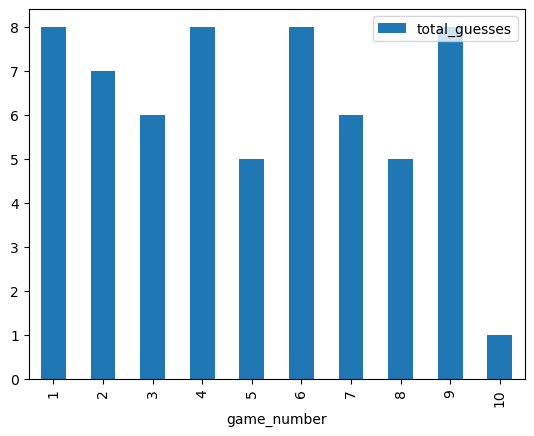

In [69]:
total_guesses.plot.bar(x='game_number', y='total_guesses')

In [78]:
low_guesses = df.groupby('game_number')['too low'].sum().reset_index()
low_guesses.sort_values('game_number', ascending = True)

,game_number,too low
0,1,3
1,2,2
2,3,1
3,4,4
4,5,0
5,6,5
6,7,1
7,8,1
8,9,4
9,10,0


In [86]:
high_guesses = df.groupby('game_number')['too high'].sum().reset_index()
high_guesses.sort_values('game_number', ascending = True)

,game_number,too high
0,1,4
1,2,4
2,3,4
3,4,3
4,5,4
5,6,2
6,7,4
7,8,3
8,9,3
9,10,0


In [87]:

#frames = [low_guesses, high_guesses]

result = pd.merge(low_guesses, high_guesses, on="game_number")

result.sort_values('game_number', ascending = True)

,game_number,too low,too high
0,1,3,4
1,2,2,4
2,3,1,4
3,4,4,3
4,5,0,4
5,6,5,2
6,7,1,4
7,8,1,3
8,9,4,3
9,10,0,0


In [67]:
# #pn.Column(player_select,int_input).servable()
# pn.template.FastListTemplate(
#     title="Guess the Number",
#     sidebar=[player_select],
#     main=[int_input, guessing, text],
#    # sidebar=[player_select, start_button],
#    # main=[int_input, text, guess_button],
# ).servable()